In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import plotly

In [14]:
single = pd.read_csv('single.csv')

In [17]:
single['单篇文章宣传程度']=single['首次分享率']*15+single['送达阅读率']
single['文章吸引程度']=single['阅读后关注人数']/single['每次分享带来阅读次数']
tag0_xc=[];#info
tag1_xc=[];#pand+info
tag2_xc=[];#pand+sci
tag3_xc=[];#info+ware
typexc=[0,0,0,0];typeat=[0,0,0,0]
size=25
for i in range(size):
    if single['防疫类'][i]==1 and single['通知类'][i]==1:
        tag1_xc.append(i)
    elif single['防疫类'][i]==1 and single['科普类'][i]==1:
        tag2_xc.append(i)
    elif single['通知类'][i]==1 and single['福利类'][i]==1:
        tag3_xc.append(i)
    else:tag0_xc.append(i)
for i in range(len(tag0_xc)):
    typexc[0]+=single['单篇文章宣传程度'][tag0_xc[i]]
    if single['文章吸引程度'][tag0_xc[i]]>0 and single['文章吸引程度'][tag0_xc[i]]<1:
        typeat[0]+=single['文章吸引程度'][tag0_xc[i]]
for i in range(len(tag1_xc)):
    typexc[1]+=single['单篇文章宣传程度'][tag1_xc[i]]
    typeat[1]+=min(single['文章吸引程度'][tag1_xc[i]],1)
for i in range(len(tag2_xc)):
    typexc[2]+=single['单篇文章宣传程度'][tag2_xc[i]]
    typeat[2]+=min(single['文章吸引程度'][tag2_xc[i]],1)
for i in range(len(tag3_xc)):
    typexc[3]+=single['单篇文章宣传程度'][tag3_xc[i]]
    typeat[3]+=min(single['文章吸引程度'][tag3_xc[i]],1)
typexc[0]/=len(tag0_xc);typeat[0]/=len(tag0_xc)
typexc[1]/=len(tag1_xc);typeat[1]/=len(tag1_xc)
typexc[2]/=len(tag2_xc);typeat[2]/=len(tag2_xc)
typexc[3]/=len(tag3_xc);typeat[3]/=len(tag3_xc)
print(typeat)
import sympy as sym
x=sym.Symbol('x')
y=sym.Symbol('y')
z=sym.Symbol('z')
w=sym.Symbol('w')
print(sym.solve([2*y-typexc[0],x+y-typexc[1],x+z-typexc[2],y+w-typexc[3]],x,y,z,w))
print(sym.solve([2*y-typeat[0],x+y-typeat[1],x+z-typeat[2],y+w-typeat[3]],x,y,z,w))
tag_sum=[sum(single['防疫类']),sum(single['通知类']),sum(single['科普类']),sum(single['福利类'])]
tag_xc=[0.491306250000000,0.427125000000000,0.485613750000000,0.193975000000000]#i copy the answer sovled above
tag_at=[0.521371964683939,0.0375871824821810,-0.386797556250609,0.210197475053491]
tag={'name':['pandemic','information','science','welfare'],'propagation':tag_xc,'tagnumber':tag_sum,'attractiveness':tag_at}
tag['cname']=['防疫类','通知类','科普类','福利类']

[0.07517436496436194, 0.5589591471661205, 0.1345744084333296, 0.24778465753567208]
{x: 0.491306250000000, y: 0.427125000000000, z: 0.485613750000000, w: 0.193975000000000}
{x: 0.521371964683939, y: 0.0375871824821810, z: -0.386797556250609, w: 0.210197475053491}


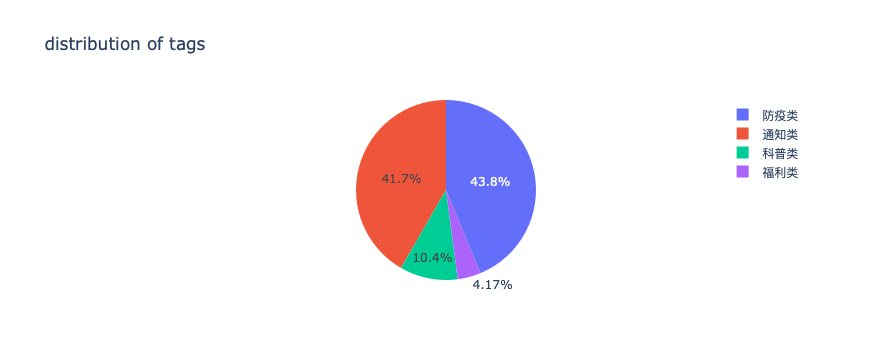

In [21]:
distribution=px.pie(tag,
      values = 'tagnumber',
      names = 'cname',
      color='cname',
      title = 'distribution of tags')
distribution.show()

In [211]:
disphoto=plotly.offline.plot(distribution, include_plotlyjs=False, output_type='div')
print(disphoto)

<div>                            <div id="7dfe9ab1-3405-48a3-b2b5-05151c879682" class="plotly-graph-div" style="height:100%; width:100%;"></div>            <script type="text/javascript">                                    window.PLOTLYENV=window.PLOTLYENV || {};                                    if (document.getElementById("7dfe9ab1-3405-48a3-b2b5-05151c879682")) {                    Plotly.newPlot(                        "7dfe9ab1-3405-48a3-b2b5-05151c879682",                        [{"domain":{"x":[0.0,1.0],"y":[0.0,1.0]},"hovertemplate":"name=%{label}<br>tagnumber=%{value}<extra></extra>","labels":["pandemic","information","science","welfare"],"legendgroup":"","name":"","showlegend":true,"values":[21,20,5,2],"type":"pie"}],                        {"legend":{"tracegroupgap":0},"template":{"data":{"barpolar":[{"marker":{"line":{"color":"#E5ECF6","width":0.5},"pattern":{"fillmode":"overlay","size":10,"solidity":0.2}},"type":"barpolar"}],"bar":[{"error_x":{"color":"#2a3f5f"},"error_y"

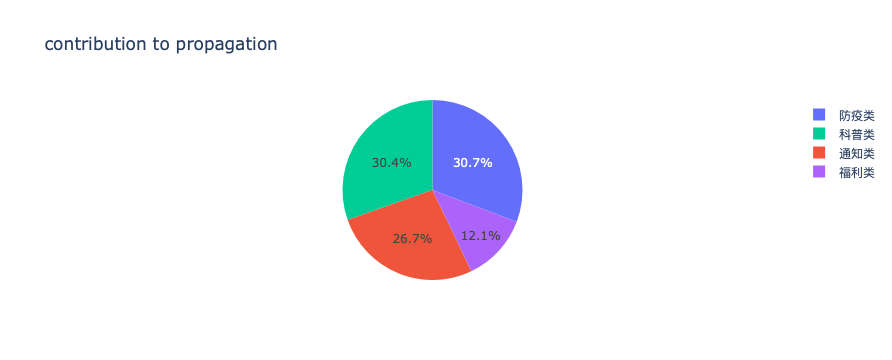

In [22]:

propophoto=px.pie(tag,
      values = 'propagation',
      names = 'cname',
      hover_name='name',
      color='cname',
      title = 'contribution to propagation')
propophoto.show()

In [9]:
print(plotly.offline.plot(propophoto, include_plotlyjs=False, output_type='div'))


<div>                            <div id="c3ff7bf8-549d-434e-a44a-cfa55b722b6b" class="plotly-graph-div" style="height:100%; width:100%;"></div>            <script type="text/javascript">                                    window.PLOTLYENV=window.PLOTLYENV || {};                                    if (document.getElementById("c3ff7bf8-549d-434e-a44a-cfa55b722b6b")) {                    Plotly.newPlot(                        "c3ff7bf8-549d-434e-a44a-cfa55b722b6b",                        [{"domain":{"x":[0.0,1.0],"y":[0.0,1.0]},"hovertemplate":"<b>%{hovertext}</b><br><br>name=%{label}<br>propagation=%{value}<extra></extra>","hovertext":["pandemic","information","science","welfare"],"labels":["pandemic","information","science","welfare"],"legendgroup":"","name":"","showlegend":true,"values":[0.49130625,0.427125,0.48561375,0.193975],"type":"pie"}],                        {"legend":{"tracegroupgap":0},"template":{"data":{"barpolar":[{"marker":{"line":{"color":"#E5ECF6","width":0.5},"pattern

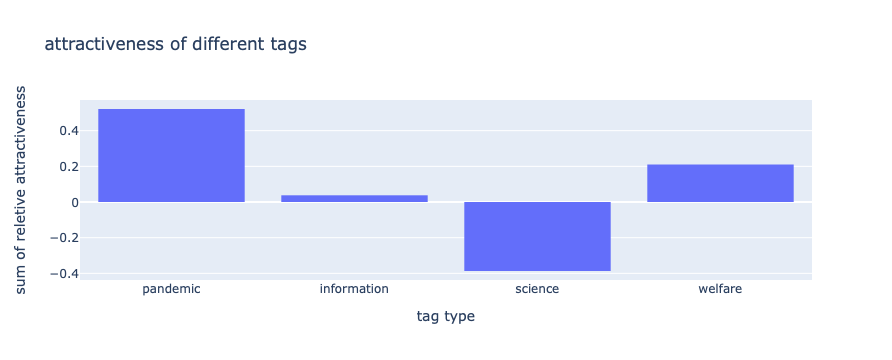

In [10]:
atcphoto=px.histogram(tag,
       y = 'attractiveness',
       x = 'name',
       hover_name = 'attractiveness',
       title = 'attractiveness of different tags',
       labels={'name': 'tag type', 'attractiveness':'reletive attractiveness'}
      )
atcphoto.show()

In [11]:
print(plotly.offline.plot(atcphoto, include_plotlyjs=False, output_type='div'))

<div>                            <div id="50e1656c-8786-4b59-95ee-73484c3b12bf" class="plotly-graph-div" style="height:100%; width:100%;"></div>            <script type="text/javascript">                                    window.PLOTLYENV=window.PLOTLYENV || {};                                    if (document.getElementById("50e1656c-8786-4b59-95ee-73484c3b12bf")) {                    Plotly.newPlot(                        "50e1656c-8786-4b59-95ee-73484c3b12bf",                        [{"alignmentgroup":"True","bingroup":"x","histfunc":"sum","hovertemplate":"tag type=%{x}<br>sum of reletive attractiveness=%{y}<extra></extra>","legendgroup":"","marker":{"color":"#636efa","pattern":{"shape":""}},"name":"","offsetgroup":"","orientation":"v","showlegend":false,"x":["pandemic","information","science","welfare"],"xaxis":"x","y":[0.521371964683939,0.037587182482181,-0.386797556250609,0.210197475053491],"yaxis":"y","type":"histogram"}],                        {"barmode":"relative","legend":{"